<a href="https://colab.research.google.com/github/ara42/Machine-Learning/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [7]:
iris = load_iris()
columns = iris.feature_names
df = pd.DataFrame(iris.data,columns = columns)
df['target'] = iris.target
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


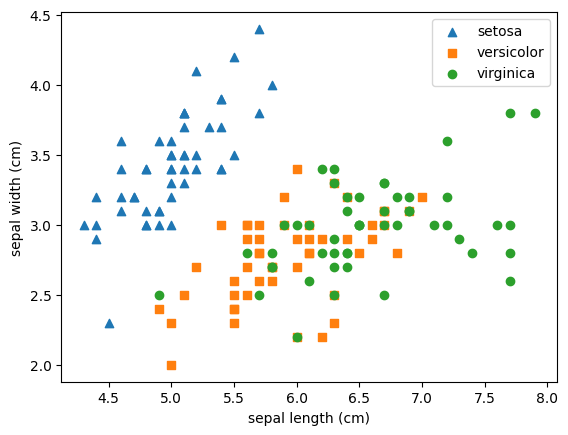

In [8]:
markers=['^','s','o']
tns = iris.target_names
for i, marker in enumerate(markers):
    f_i = df['target']==i   #품종별로 필터링
    df_i = df[f_i]          #특정 품종만 추출
    x_data = df_i[columns[0]] #컬럼[0]을 x 데이터로 설정
    y_data = df_i[columns[1]] #컬럼[1]을 y 데이터로 설정
    plt.scatter(x_data,y_data,
                marker=marker,label=tns[i])
plt.xlabel(columns[0])
plt.ylabel(columns[1])
plt.legend()
plt.show()

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
#ss = StandardScaler()
#scaled_data = ss.fit_transform(df.drop("target",axis=1))

In [9]:
data = df.drop('target',axis=1)
ss = StandardScaler()
scaled_data = ss.fit_transform(data)

In [10]:
from sklearn.decomposition import PCA

In [12]:
pca = PCA(n_components=2)
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)
print(scaled_data.shape,' -> ',pca_data.shape)

(150, 4)  ->  (150, 2)


In [13]:
pd.DataFrame(scaled_data).head(1)

,0,1,2,3
0,-0.900681,1.019004,-1.340227,-1.315444


In [14]:
pd.DataFrame(pca_data).head(1)

,0,1
0,-2.264703,0.480027


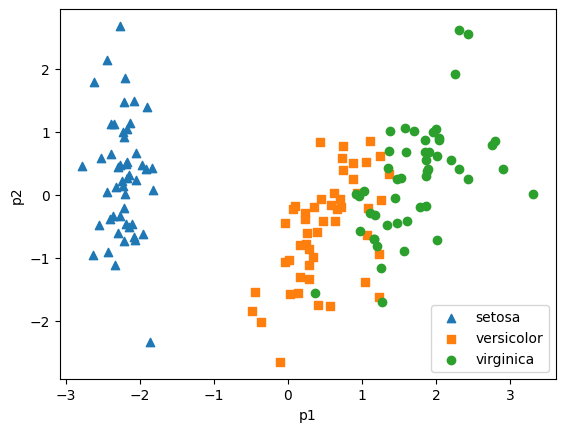

In [17]:
df2 = pd.DataFrame(pca_data,columns=['p1','p2'])
markers=['^','s','o']
tns = iris.target_names
for i, marker in enumerate(markers):
    f_i = df['target']==i   #품종별로 필터링
    df_i = df2[f_i]          #특정 품종만 추출
    x_data = df_i['p1'] #컬럼[0]을 x 데이터로 설정
    y_data = df_i['p2'] #컬럼[1]을 y 데이터로 설정
    plt.scatter(x_data,y_data,
                marker=marker,label=tns[i])
plt.xlabel('p1')
plt.ylabel('p2')
plt.legend()
plt.show()

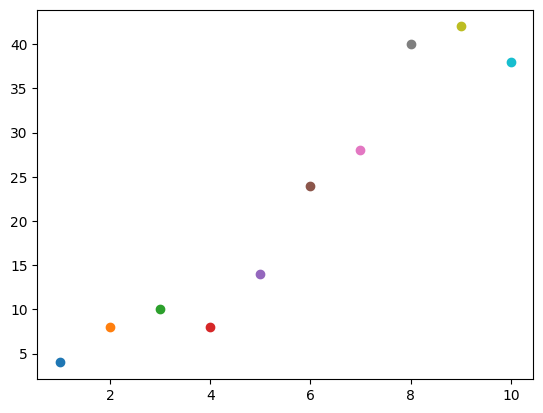

In [25]:
x = [1,2,3,4,5,6,7,8,9,10]
y = [4,8,10,8,14,24,28,40,42,38]
for i in range(len(x)):
    plt.scatter(x[i],y[i])
plt.show()

In [27]:
sample = pd.DataFrame()
sample['x'] = x
sample['y'] = y
pca = PCA(n_components = 1)
pca_sam = pca.fit_transform(sample)
pca_sam

array([[-18.13826789],
       [-14.02033539],
       [-11.86454466],
       [-13.63303746],
       [ -7.55296319],
       [  2.4513946 ],
       [  6.5693271 ],
       [ 18.53582666],
       [ 20.6916174 ],
       [ 16.96098284]])

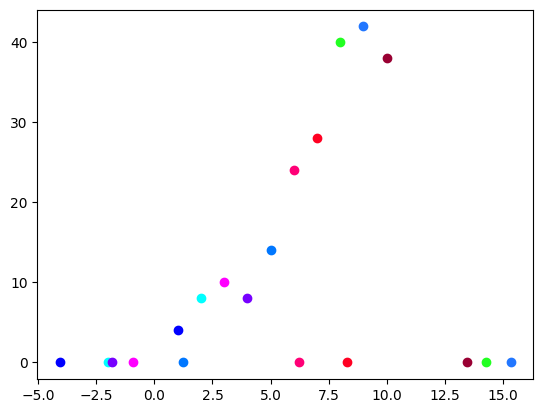

In [28]:
colors = ['#0000ff','#00ffff','#ff00ff',
          '#7700ff','#0077ff','#ff0077',
          '#ff0022','#22ff22','#2277ff',
          '#990033']
for i in range(len(x)):
  plt.plot(x[i],y[i],marker='o',color=colors[i])
  plt.plot((pca_sam[i]+10)/2,0,marker='o',color=colors[i])
plt.show()

In [29]:
pca.explained_variance_

array([224.20013152])

In [30]:
pd.DataFrame(scaled_data).head(1)

,0,1,2,3
0,-0.900681,1.019004,-1.340227,-1.315444


In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [32]:
rfc = RandomForestClassifier()
s = cross_val_score(rfc,pca_data,iris.target,scoring='accuracy',cv=5)
print("정확도:",s)
print("평균:",s.mean())

정확도: [0.83333333 0.93333333 0.83333333 0.86666667 1.        ]
평균: 0.8933333333333333


In [33]:
path = '/content/drive/MyDrive/Colab Notebooks/Machine-Learning/creadit_card_clients.csv'

In [35]:
df = pd.read_csv(path)
print(df.shape)
df.head(3)

(30000, 25)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0


In [36]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [37]:
df=df.rename(columns={'PAY_0':'PAY_1','default.payment.next.month':'default'})
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')

In [38]:
data = df.drop('default',axis=1)
label = df['default']

In [39]:
data.corr()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
ID,1.000000,0.026179,0.018497,0.039177,-0.029079,0.018678,-0.030575,-0.011215,-0.018494,-0.002735,...,0.024354,0.040351,0.016705,0.016730,0.009742,0.008406,0.039151,0.007793,0.000652,0.003000
LIMIT_BAL,0.026179,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,...,0.283236,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595
SEX,0.018497,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,...,-0.024563,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766
EDUCATION,0.039177,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,...,0.013002,-0.000451,-0.007567,-0.009099,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200
MARRIAGE,-0.029079,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,...,-0.024909,-0.023344,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641
AGE,0.018678,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,...,0.053710,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478
PAY_1,-0.030575,-0.271214,-0.057643,0.105364,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,...,0.179785,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673
PAY_2,-0.011215,-0.296382,-0.070771,0.121566,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,...,0.224146,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500
PAY_3,-0.018494,-0.286123,-0.066096,0.114025,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,...,0.227494,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861
PAY_4,-0.002735,-0.267460,-0.060173,0.108793,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,...,0.244983,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565


In [44]:
data = df.drop('default',axis=1)
label = df['default']

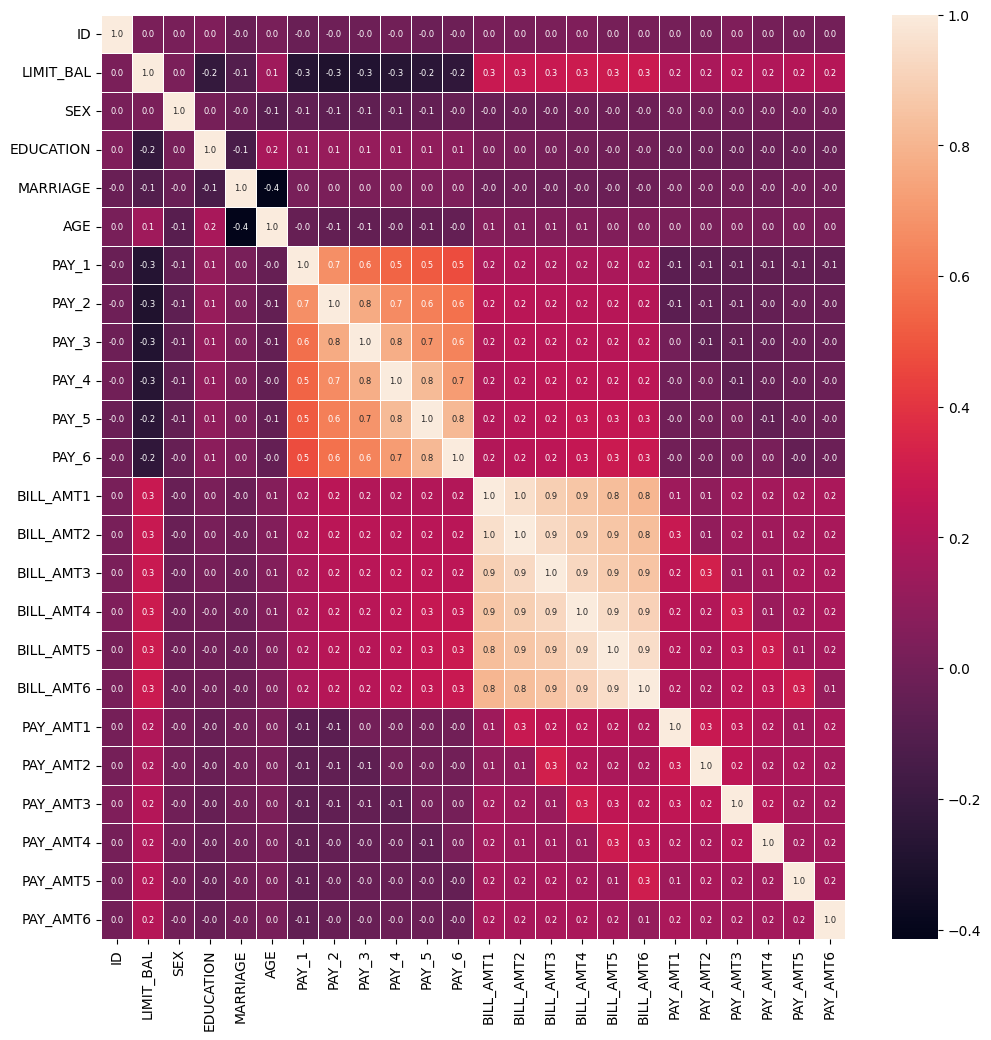

In [41]:
corr = data.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr,
            annot=True,
            fmt='.1f',
           linewidths=.5,
           annot_kws={"size": 6})
plt.show()


In [43]:
pca = PCA(n_components=8)
pca_data = pca.fit_transform(data)
print(sum(pca.explained_variance_ratio_))
print(data.shape,' -> ',pca_data.shape)

0.9840196308131632
(30000, 24)  ->  (30000, 8)


In [45]:
import time

In [46]:
rfc = RandomForestClassifier(n_estimators=500)
st = time.time()
s = cross_val_score(rfc,data,label,scoring='accuracy',cv=5)
et = time.time()
print("소요시간 : ",et-st)
print("정확도 : ",s)
print("평균 : ",s.mean())

소요시간 :  238.37660908699036
정확도 :  [0.80566667 0.80966667 0.818      0.8315     0.82066667]
평균 :  0.8170999999999999


In [47]:
rfc = RandomForestClassifier(n_estimators=500)
st = time.time()
s = cross_val_score(rfc,pca_data,label,scoring='accuracy',cv=5)
et = time.time()
print("소요시간 : ",et-st)
print("정확도 : ",s)
print("평균 : ",s.mean())

소요시간 :  209.8901596069336
정확도 :  [0.77433333 0.7825     0.78466667 0.79083333 0.78283333]
평균 :  0.7830333333333334


In [48]:
ss=StandardScaler()
sd=ss.fit_transform(data)
pca=PCA(n_components=8)
pca_data2 =pca.fit_transform(sd)
rfc = RandomForestClassifier(n_estimators=500)
st=time.time()
s= cross_val_score(rfc,pca_data2,label,scoring='accuracy',cv=5)
et=time.time()
print('소요시간',et-st)
print('정확도:',s)
print('평균:',s.mean())

소요시간 231.18155026435852
정확도: [0.78916667 0.79583333 0.8        0.81133333 0.798     ]
평균: 0.7988666666666666
